     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]
     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


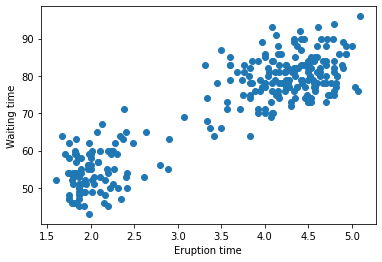

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,mixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


df=[]
df = pd.read_csv('data.tsv',sep="\t")
print(df)

plt.ylabel('Waiting time')
plt.xlabel('Eruption time')
plt.plot(df['eruptions'],df['waiting'],linestyle='',marker='o')
print(df)

#Resources: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-Means
Centers
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]

Gaussian Mixture
Weights
[0.49535208 0.50464792]
Centers
[[ 3.48358149 71.05208813]
 [ 3.49190729 70.74488522]]


Text(0.5, 0, 'Eruption time, GM/EM clustering, 25 iter')

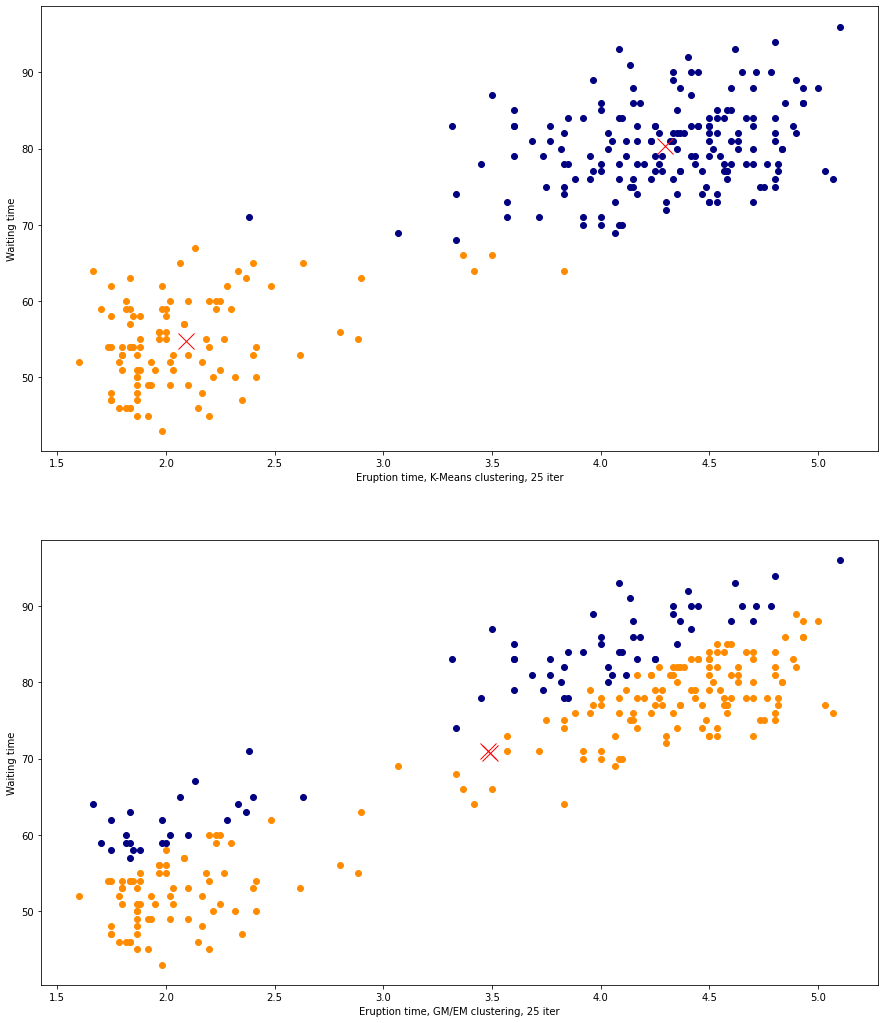

In [3]:
iter=25


GM = GaussianMixture(n_components=2, init_params='random',max_iter=iter)
KM = KMeans(n_clusters=2,init='random',max_iter=iter)
dfn=pd.DataFrame()
kmfit = KM.fit(df)

kmcenters=kmfit.cluster_centers_
dfn['kmlabels']=kmfit.labels_

print('K-Means')
#print(kmfit.labels_)
print('Centers')
print(kmcenters)

print('')

gmfit = GM.fit(df)
gmcenters = gmfit.means_
dfn['gmlabels']=gmfit.predict(df)
#df['gmlabels'] = gmfit.labels_
#gmcenters=gmfit.cluster_centers_

print('Gaussian Mixture')
print('Weights')
print(gmfit.weights_)
print('Centers')
print(gmcenters)

colors = ["navy","darkorange"]


plt.rcParams["figure.figsize"] = (15,18)
plt.subplot(2,1,1)
for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn['kmlabels'][i]])
plt.plot(kmcenters[0,0],kmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(kmcenters[1,0],kmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, K-Means clustering, %s iter' % iter)

plt.subplot(2,1,2)
for i in range(0,len(df)):
    plt.plot(df['eruptions'][i],df['waiting'][i],linestyle='',
             marker='o',color=colors[dfn['gmlabels'][i]])

plt.plot(gmcenters[0,0],gmcenters[0,1],linestyle='',marker='x',color='red',markersize=16)
plt.plot(gmcenters[1,0],gmcenters[1,1],linestyle='',marker='x',color='red',markersize=16)
plt.ylabel('Waiting time')
plt.xlabel('Eruption time, GM/EM clustering, %s iter' % iter)